### 전국 신용카드 승인금액

In [19]:
import pandas as pd

# csv파일 불러오기
df = pd.read_csv('./data/카드_전국.csv')
df.head()

,날짜,전국_합계,전국_종합소매,전국_ 백화점,전국_ 대형마트/유통전문점,전국_ 슈퍼마켓,전국_ 편의점,전국_ 면세점,전국_전자상거래/통신판매,전국_식료품,...,전국_오락/문화,전국_ 스포츠/오락/여가,전국_ 서적/문구,전국_교육,전국_숙박/음식,전국_ 숙박,전국_ 음식점,전국_공과금/개인 및 전문 서비스,전국_금융/보험,전국_기타
0,2012/11,299970.34,53558.49,13695.10,26123.23,10604.38,1826.54,1309.25,29166.45,4778.33,...,13142.50,10450.19,2692.31,8644.69,33317.61,2119.99,31197.62,25205.61,10618.86,18468.27
1,2012/12,310533.02,57731.17,14542.45,28802.59,11308.05,1810.70,1267.38,29971.83,4895.34,...,12041.55,9030.65,3010.90,8440.60,37410.08,2454.51,34955.56,25947.67,10529.91,19655.81
2,2013/01,296732.27,51384.80,11189.07,25640.42,11435.88,1778.78,1340.65,28545.80,5024.76,...,10803.91,8001.41,2802.50,8776.78,34309.86,2458.03,31851.83,30498.42,10421.99,19792.28
3,2013/02,267365.92,48141.86,9748.40,25035.42,10602.32,1652.60,1103.11,24596.71,5510.28,...,9302.49,6800.21,2502.28,8431.41,28779.93,1821.75,26958.18,25149.57,9509.00,18103.45
4,2013/03,295640.18,49572.79,10873.94,24769.86,10904.74,1877.38,1146.88,26704.28,4775.35,...,12895.59,9214.35,3681.25,8996.41,34196.47,1898.21,32298.26,25570.21,10253.94,19820.98


In [20]:
# 날짜 컬럼 "/" 제거
df["날짜"] = df["날짜"].str.replace("/", "")

# 날짜 컬럼 int 타입으로 변환
df["날짜"] = df["날짜"].astype(int)

# 날짜 데이터타임 변환 후 인덱스 변환
df["날짜"] = pd.to_datetime(df["날짜"], format='%Y%m')
df["날짜"] = df["날짜"].dt.strftime('%Y-%m')
df.set_index('날짜', inplace=True)

In [21]:
# 컬럼 맞추기
df.columns = df.columns.str.replace('_ ','_')
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['전국_합계', '전국_종합소매', '전국_백화점', '전국_대형마트/유통전문점', '전국_슈퍼마켓', '전국_편의점',
       '전국_면세점', '전국_전자상거래/통신판매', '전국_식료품', '전국_일반식료품', '전국_건강보조식품',
       '전국_의류/잡화', '전국_의복/직물', '전국_복식잡화', '전국_시계/귀금속/안경', '전국_화장품', '전국_연료',
       '전국_가구/가전', '전국_가구', '전국_가전제품/정보통신기기', '전국_의료/보건', '전국_종합병원',
       '전국_일반병의원/기타의료기관', '전국_자동차', '전국_국산자동차신품', '전국_기타운송수단', '전국_자동차부품및정비',
       '전국_여행/교통', '전국_여행사/자동차임대', '전국_항공사', '전국_대중교통', '전국_오락/문화',
       '전국_스포츠/오락/여가', '전국_서적/문구', '전국_교육', '전국_숙박/음식', '전국_숙박', '전국_음식점',
       '전국_공과금/개인및전문서비스', '전국_금융/보험', '전국_기타'],
      dtype='object')

In [37]:
df.columns = ['합계', '종합소매', '백화점', '대형마트/유통전문점', '슈퍼마켓', '편의점',
       '면세점', '전자상거래/통신판매', '식료품', '일반식료품', '건강보조식품',
       '의류/잡화', '의복/직물', '복식잡화', '시계/귀금속/안경', '화장품', '연료',
       '가구/가전', '가구', '가전제품/정보통신기기', '의료/보건', '종합병원',
       '일반병의원/기타의료기관', '자동차', '국산자동차신품', '기타운송수단', '자동차부품및정비',
       '여행/교통', '여행사/자동차임대', '항공사', '대중교통', '오락/문화',
       '스포츠/오락/여가', '서적/문구', '교육', '숙박/음식', '숙박', '음식점',
       '공과금/개인및전문서비스', '금융/보험', '기타']

### 분류별 상품 나누기

In [39]:
# 합계 분류 하기
df_t = df[['종합소매','전자상거래/통신판매', '식료품','의류/잡화', 
'연료','가구/가전', '의료/보건', '자동차', '여행/교통', '스포츠/오락/여가', '서적/문구', '교육','숙박','음식점'
,'공과금/개인및전문서비스', '금융/보험']]
# 등락률 구하기
df_t1 = df[['종합소매','전자상거래/통신판매', '식료품','의류/잡화',
'연료','가구/가전', '의료/보건', '자동차', '여행/교통', '스포츠/오락/여가', '서적/문구', '교육','숙박','음식점'
,'공과금/개인및전문서비스', '금융/보험']].pct_change().round(2)

In [23]:
'''day = pd.read_csv('./csv/work file_신용카드_분석_컬럼 분리.csv')
day = day.iloc[:-3]
# 날짜 컬럼 "/" 제거
day["날짜"] = day["날짜"].str.replace("/", "")

# 날짜 컬럼 int 타입으로 변환
#day["날짜"] = day["날짜"].astype(int)

# 날짜 데이터타임 변환 후 인덱스 변환
day["날짜"] = pd.to_datetime(day["날짜"], format='%Y%m')
day["날짜"] = day["날짜"].dt.strftime('%Y-%m')
day.set_index('날짜', inplace=True)
day.head()'''


'day = pd.read_csv(\'./csv/work file_신용카드_분석_컬럼 분리.csv\')\nday = day.iloc[:-3]\n# 날짜 컬럼 "/" 제거\nday["날짜"] = day["날짜"].str.replace("/", "")\n\n# 날짜 컬럼 int 타입으로 변환\n#day["날짜"] = day["날짜"].astype(int)\n\n# 날짜 데이터타임 변환 후 인덱스 변환\nday["날짜"] = pd.to_datetime(day["날짜"], format=\'%Y%m\')\nday["날짜"] = day["날짜"].dt.strftime(\'%Y-%m\')\nday.set_index(\'날짜\', inplace=True)\nday.head()'

In [40]:
# 온/오프라인 구분
df_on = df[['전자상거래/통신판매']]
df_off = df[['종합소매','식료품','의류/잡화', '복식잡화',
'연료','가구/가전', '의료/보건', '자동차', '여행/교통', '스포츠/오락/여가','숙박','음식점'
,'공과금/개인및전문서비스', '금융/보험', '기타']]
# 등락률 구하기
df_on1 = df[['전자상거래/통신판매']].pct_change().round(2)
df_off2 = df[['종합소매','식료품','의류/잡화', '복식잡화',
'연료','가구/가전', '의료/보건', '자동차', '여행/교통', '스포츠/오락/여가','숙박','음식점'
,'공과금/개인및전문서비스', '금융/보험', '기타']].pct_change().round(2)

In [41]:
# 소모품 구분
df_dura = df[['자동차','가구/가전']]
df_semidura = df[['의류/잡화','스포츠/오락/여가']]
df_nondura = df[['식료품','연료']]
# 등락률 구하기
df_dura1 = df[['자동차','가구/가전']].pct_change().round(2)
df_semidura1 = df[['의류/잡화','스포츠/오락/여가']].pct_change().round(2)
df_nondura1 = df[['식료품','연료']].pct_change().round(2)

In [42]:
# 서비스 상품 구분
df_servise = df[['여행/교통','숙박','음식점','공과금/개인및전문서비스', '금융/보험'
,'서적/문구','의료/보건']]
# 등락률 구하기
df_servise = df[['여행/교통','숙박','음식점','공과금/개인및전문서비스', '금융/보험'
,'서적/문구','의료/보건']].pct_change().round(2)

In [43]:
# 상품 나누기
'''df_res = df[['날짜','숙박/음식', '숙박', '음식점']]
df_shooping = df[['날짜', '백화점', '대형마트/유통전문점', '슈퍼마켓', '편의점']]
df_vechicle = df[['날짜', '자동차', '국산자동차신품', '기타운송수단', '자동차 부품 및 정비', '연료']]
df_travel = df[['날짜','면세점','여행/교통','여행사/자동차임대','항공사','대중교통','오락/문화','스포츠/오락/여가']]
df_retail = df[['날짜','종합소매','식료품','일반식료품','가구/가전','가구','가전제품/정보통신기기']]
df_fashion = df[['날짜','의류/잡화','의복/직물','복식잡화','시계/귀금속/안경','화장품']]
df_online = df[['날짜','전자상거래/통신판매']]
df_hospital = df[['날짜','건강보조식품','의료/보건','종합병원','일반병의원/기타의료기관']]
df_etc = df[['날짜','서적/문구','교육','공과금/개인및전문서비스','금융/보험','기타']]'''

"df_res = df[['날짜','숙박/음식', '숙박', '음식점']]\ndf_shooping = df[['날짜', '백화점', '대형마트/유통전문점', '슈퍼마켓', '편의점']]\ndf_vechicle = df[['날짜', '자동차', '국산자동차신품', '기타운송수단', '자동차 부품 및 정비', '연료']]\ndf_travel = df[['날짜','면세점','여행/교통','여행사/자동차임대','항공사','대중교통','오락/문화','스포츠/오락/여가']]\ndf_retail = df[['날짜','종합소매','식료품','일반식료품','가구/가전','가구','가전제품/정보통신기기']]\ndf_fashion = df[['날짜','의류/잡화','의복/직물','복식잡화','시계/귀금속/안경','화장품']]\ndf_online = df[['날짜','전자상거래/통신판매']]\ndf_hospital = df[['날짜','건강보조식품','의료/보건','종합병원','일반병의원/기타의료기관']]\ndf_etc = df[['날짜','서적/문구','교육','공과금/개인및전문서비스','금융/보험','기타']]"

In [44]:
# 등락률 구하기
'''df_res['숙박/음식_등락률'] = df_res['숙박/음식'].pct_change().round(2)
df_res['숙박_등락률'] = df_res['숙박'].pct_change().round(2)
df_res['음식점_등락률'] = df_res['음식점'].pct_change().round(2)
df_shooping['백화점_등락률'] = df_shooping['백화점'].pct_change().round(2)
df_shooping['대형마트/유통전문점_등락률'] = df_shooping['대형마트/유통전문점'].pct_change().round(2)
df_shooping['슈퍼마켓_등락률'] = df_shooping['슈퍼마켓'].pct_change().round(2)
df_shooping['편의점_등락률'] = df_shooping['편의점'].pct_change().round(2)
df_vechicle['자동차_등락률'] = df_vechicle['자동차'].pct_change().round(2)
df_vechicle['국산자동차신품_등락률'] = df_vechicle['국산자동차신품'].pct_change().round(2)
df_vechicle['기타운송수단_등락률'] = df_vechicle['기타운송수단'].pct_change().round(2)
df_vechicle['자동차 부품 및 정비_등락률'] = df_vechicle['자동차 부품 및 정비'].pct_change().round(2)
df_vechicle['연료_등락률'] = df_vechicle['연료'].pct_change().round(2)
df_travel['면세점_등락률'] = df_travel['면세점'].pct_change().round(2)
df_travel['여행/교통_등락률'] = df_travel['여행/교통'].pct_change().round(2)
df_travel['여행사/자동차임대_등락률'] = df_travel['여행사/자동차임대'].pct_change().round(2)
df_travel['항공사_등락률'] = df_travel['항공사'].pct_change().round(2)
df_travel['대중교통_등락률'] = df_travel['대중교통'].pct_change().round(2)
df_travel['오락/문화_등락률'] = df_travel['오락/문화'].pct_change().round(2)
df_travel['스포츠/오락/여가_등락률'] = df_travel['스포츠/오락/여가'].pct_change().round(2)
df_retail['종합소매_등락률'] = df_retail['종합소매'].pct_change().round(2)
df_retail['식료품_등락률'] = df_retail['식료품'].pct_change().round(2)
df_retail['일반식료품_등락률'] = df_retail['일반식료품'].pct_change().round(2)
df_retail['가구/가전_등락률'] = df_retail['가구/가전'].pct_change().round(2)
df_retail['가구_등락률'] = df_retail['가구'].pct_change().round(2)
df_retail['가전제품/정보통신기기_등락률'] = df_retail['가전제품/정보통신기기'].pct_change().round(2)
df_fashion['의류/잡화_등락률'] = df_fashion['의류/잡화'].pct_change().round(2)
df_fashion['의복/직물_등락률'] = df_fashion['의복/직물'].pct_change().round(2)
df_fashion['복식잡화_등락률'] = df_fashion['복식잡화'].pct_change().round(2)
df_fashion['시계/귀금속/안경_등락률'] = df_fashion['시계/귀금속/안경'].pct_change().round(2)
df_fashion['화장품_등락률'] = df_fashion['화장품'].pct_change().round(2)
df_online['전자상거래/통신판매_등락률'] = df_online['전자상거래/통신판매'].pct_change().round(2)
df_hospital['건강보조식품_등락률'] = df_hospital['건강보조식품'].pct_change().round(2)
df_hospital['의료/보건_등락률'] = df_hospital['의료/보건'].pct_change().round(2)
df_hospital['종합병원_등락률'] = df_hospital['종합병원'].pct_change().round(2)
df_hospital['일반병의원/기타의료기관_등락률'] = df_hospital['일반병의원/기타의료기관'].pct_change().round(2)
df_etc['서적/문구_등락률'] = df_etc['서적/문구'].pct_change().round(2)
df_etc['교육_등락률'] = df_etc['교육'].pct_change().round(2)
df_etc['공과금/개인및전문서비스_등락률'] = df_etc['공과금/개인및전문서비스'].pct_change().round(2)
df_etc['금융/보험_등락률'] = df_etc['금융/보험'].pct_change().round(2)
df_etc['기타_등락률'] = df_etc['기타'].pct_change().round(2)'''

"df_res['숙박/음식_등락률'] = df_res['숙박/음식'].pct_change().round(2)\ndf_res['숙박_등락률'] = df_res['숙박'].pct_change().round(2)\ndf_res['음식점_등락률'] = df_res['음식점'].pct_change().round(2)\ndf_shooping['백화점_등락률'] = df_shooping['백화점'].pct_change().round(2)\ndf_shooping['대형마트/유통전문점_등락률'] = df_shooping['대형마트/유통전문점'].pct_change().round(2)\ndf_shooping['슈퍼마켓_등락률'] = df_shooping['슈퍼마켓'].pct_change().round(2)\ndf_shooping['편의점_등락률'] = df_shooping['편의점'].pct_change().round(2)\ndf_vechicle['자동차_등락률'] = df_vechicle['자동차'].pct_change().round(2)\ndf_vechicle['국산자동차신품_등락률'] = df_vechicle['국산자동차신품'].pct_change().round(2)\ndf_vechicle['기타운송수단_등락률'] = df_vechicle['기타운송수단'].pct_change().round(2)\ndf_vechicle['자동차 부품 및 정비_등락률'] = df_vechicle['자동차 부품 및 정비'].pct_change().round(2)\ndf_vechicle['연료_등락률'] = df_vechicle['연료'].pct_change().round(2)\ndf_travel['면세점_등락률'] = df_travel['면세점'].pct_change().round(2)\ndf_travel['여행/교통_등락률'] = df_travel['여행/교통'].pct_change().round(2)\ndf_travel['여행사/자동차임대_등락률'] = df_travel['여행사/자동차임대

### 소비자 물가지수 불러오기

In [29]:
cpi_df = pd.read_csv('./csv/소비자물가지수_2020100__20220811151333.csv',encoding='cp949')

# 컬럼 문자열로 바꾸기
cpi_df["시점"] = cpi_df["시점"].astype(str)

# .10 이 .1로 변환된 걸 다시 재변환
cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"

# 컬럼명 변경
cpi_df.rename(columns={'전국' : '소비자물가지수'}, inplace=True)
# 날짜 맞추기
cpi_df = cpi_df.iloc[:-3]

# 데이터타임 변황 후 시점컬럼명 날짜로 바꾸기
cpi_df["시점"] = pd.to_datetime(cpi_df["시점"], format="%Y.%m")
cpi_df["시점"] = cpi_df["시점"].dt.strftime('%Y-%m')
cpi_df.rename(columns={"시점" : "날짜"}, inplace=True)
cpi_df.set_index('날짜', inplace=True)
cpi_df

C:\Users\82104\AppData\Local\Temp\ipykernel_2000\3132659229.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"
C:\Users\82104\AppData\Local\Temp\ipykernel_2000\3132659229.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_df["시점"] = pd.to_datetime(cpi_df["시점"], format="%Y.%m")
C:\Users\82104\AppData\Local\Temp\ipykernel_2000\3132659229.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,소비자물가지수
날짜,
2012-11,92.011
2012-12,92.175
2013-01,92.728
2013-02,93.038
2013-03,92.952
...,...
2021-12,104.040
2022-01,104.690
2022-02,105.300


### 시장금리 불러오기

In [30]:
interest_rates_df = pd.read_csv('./csv/시장금리.csv')
interest_rates_df.set_index('날짜', inplace=True)
interest_rates_df

,국고채_3년_평균,국고채_5년_평균,국고채_10년_평균,회사채_3년_평균,CD_91몰_평균,콜금리_1일몰_평균,기준금리
날짜,,,,,,,
2012-11,2.80,2.87,2.99,3.32,2.85,2.75,2.75
2012-12,2.85,2.98,3.13,3.30,2.88,2.75,2.75
2013-01,2.75,2.86,3.05,3.20,2.86,2.76,2.75
2013-02,2.70,2.83,3.04,3.06,2.83,2.75,2.75
2013-03,2.60,2.69,2.91,2.95,2.81,2.74,2.75
...,...,...,...,...,...,...,...
2021-12,1.80,1.98,2.19,2.41,1.27,1.01,1.00
2022-01,2.06,2.28,2.49,2.63,1.39,1.19,1.25
2022-02,2.29,2.50,2.69,2.87,1.50,1.22,1.25


### 소매판매지수 불러오기

In [31]:
socell_df = pd.read_csv('./csv/소매판매지수_1211_2204.csv')
socell_df = socell_df[['날짜','불변_총지수']]
socell_df.rename(columns={'불변_총지수' : '소매판매지수'}, inplace=True)
socell_df.set_index('날짜', inplace=True)
socell_df

,소매판매지수
날짜,
2012-11,97.5
2012-12,99.8
2013-01,91.2
2013-02,86.8
2013-03,93.6
...,...
2021-12,127.2
2022-01,117.5
2022-02,107.9


### 카드 소비 합치기

In [32]:
total_csi = pd.merge(cpi_df, socell_df, how='left', left_index=True, right_index=True)
total_csi = pd.merge(total_csi, interest_rates_df,  how='left', left_index=True, right_index=True)
total_csi.drop_duplicates(inplace=True)
total_csi.head()

,소비자물가지수,소매판매지수,국고채_3년_평균,국고채_5년_평균,국고채_10년_평균,회사채_3년_평균,CD_91몰_평균,콜금리_1일몰_평균,기준금리
날짜,,,,,,,,,
2012-11,92.011,97.5,2.80,2.87,2.99,3.32,2.85,2.75,2.75
2012-12,92.175,99.8,2.85,2.98,3.13,3.30,2.88,2.75,2.75
2013-01,92.728,91.2,2.75,2.86,3.05,3.20,2.86,2.76,2.75
2013-02,93.038,86.8,2.70,2.83,3.04,3.06,2.83,2.75,2.75
2013-03,92.952,93.6,2.60,2.69,2.91,2.95,2.81,2.74,2.75


### 코로나 전 후 비교를 위한 기간설정

In [33]:
df_t = df_t.iloc[:86]
cpi_df = cpi_df.iloc[:-28]
interest_rates_df = interest_rates_df.iloc[:-28]
socell_df = socell_df.iloc[:-28]

### 상관관계

In [51]:
# 사용할 컬럼 불러오기
total_df = df_t
total_df = pd.DataFrame(total_df)
#total_df = total_df[total_df.columns.drop('일수')]
#total_df = total_df[total_df.columns.drop('합계')]
total_df = pd.merge(total_df,total_csi, how='left', left_index=True, right_index=True)
#total_df = pd.concat([total_df,total_csi],axis=1).reindex(total_csi.index)
total_df = total_df[['전자상거래/통신판매', '식료품','의류/잡화', '연료','가구/가전', '의료/보건', 
                     '자동차', '여행/교통', '스포츠/오락/여가', '서적/문구', '교육','숙박','음식점',
                     '공과금/개인및전문서비스', '금융/보험','소비자물가지수','소매판매지수','국고채_3년_평균',
                     '국고채_5년_평균','국고채_10년_평균','회사채_3년_평균','CD_91몰_평균','콜금리_1일몰_평균',
                     '기준금리']]
total_df.head()

,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,스포츠/오락/여가,서적/문구,...,금융/보험,소비자물가지수,소매판매지수,국고채_3년_평균,국고채_5년_평균,국고채_10년_평균,회사채_3년_평균,CD_91몰_평균,콜금리_1일몰_평균,기준금리
날짜,,,,,,,,,,,,,,,,,,,,,
2012-11,29166.45,4778.33,14573.28,31259.23,9075.53,22958.88,19238.93,5963.69,10450.19,2692.31,...,10618.86,92.011,97.5,2.80,2.87,2.99,3.32,2.85,2.75,2.75
2012-12,29971.83,4895.34,14114.97,30662.26,7966.34,21824.52,22950.20,6390.76,9030.65,3010.90,...,10529.91,92.175,99.8,2.85,2.98,3.13,3.30,2.88,2.75,2.75
2013-01,28545.80,5024.76,11912.48,29951.78,7911.53,24766.40,15857.30,6774.19,8001.41,2802.50,...,10421.99,92.728,91.2,2.75,2.86,3.05,3.20,2.86,2.76,2.75
2013-02,24596.71,5510.28,11094.71,27288.38,7723.07,21469.13,16453.30,5812.63,6800.21,2502.28,...,9509.00,93.038,86.8,2.70,2.83,3.04,3.06,2.83,2.75,2.75
2013-03,26704.28,4775.35,13126.75,30351.01,9811.29,23354.47,20131.39,6079.25,9214.35,3681.25,...,10253.94,92.952,93.6,2.60,2.69,2.91,2.95,2.81,2.74,2.75


In [52]:
# 컬럼별 등락률 계산

col_list = []
col_list.append([col for col in total_df])

total_df1 = pd.DataFrame()

for i in col_list:
    total_df1[i] = total_df[i].pct_change()
    
total_df1 = total_df1.iloc[1:]
total_df1.head()

,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,스포츠/오락/여가,서적/문구,...,금융/보험,소비자물가지수,소매판매지수,국고채_3년_평균,국고채_5년_평균,국고채_10년_평균,회사채_3년_평균,CD_91몰_평균,콜금리_1일몰_평균,기준금리
날짜,,,,,,,,,,,,,,,,,,,,,
2012-12,0.027613,0.024488,-0.031449,-0.019097,-0.122218,-0.049408,0.192904,0.071612,-0.135839,0.118333,...,-0.008377,0.001782,0.023590,0.017857,0.038328,0.046823,-0.006024,0.010526,0.000000,0.0
2013-01,-0.047579,0.026437,-0.156039,-0.023171,-0.006880,0.134797,-0.309056,0.059998,-0.113972,-0.069215,...,-0.010249,0.005999,-0.086172,-0.035088,-0.040268,-0.025559,-0.030303,-0.006944,0.003636,0.0
2013-02,-0.138342,0.096626,-0.068648,-0.088923,-0.023821,-0.133135,0.037585,-0.141945,-0.150124,-0.107126,...,-0.087602,0.003343,-0.048246,-0.018182,-0.010490,-0.003279,-0.043750,-0.010490,-0.003623,0.0
2013-03,0.085685,-0.133374,0.183154,0.112232,0.270387,0.087816,0.223547,0.045869,0.355010,0.471158,...,0.078341,-0.000924,0.078341,-0.037037,-0.049470,-0.042763,-0.035948,-0.007067,-0.003636,0.0
2013-04,0.045225,0.001931,-0.009763,-0.027114,-0.081842,-0.038601,0.004995,0.060437,0.028387,-0.204835,...,0.025264,-0.001388,-0.018162,-0.019231,-0.022305,-0.024055,-0.013559,-0.003559,0.003650,0.0


In [53]:
total_df1[['소매판매지수','서적/문구']].head()

,소매판매지수,서적/문구
날짜,,
2012-12,0.023590,0.118333
2013-01,-0.086172,-0.069215
2013-02,-0.048246,-0.107126
2013-03,0.078341,0.471158
2013-04,-0.018162,-0.204835


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


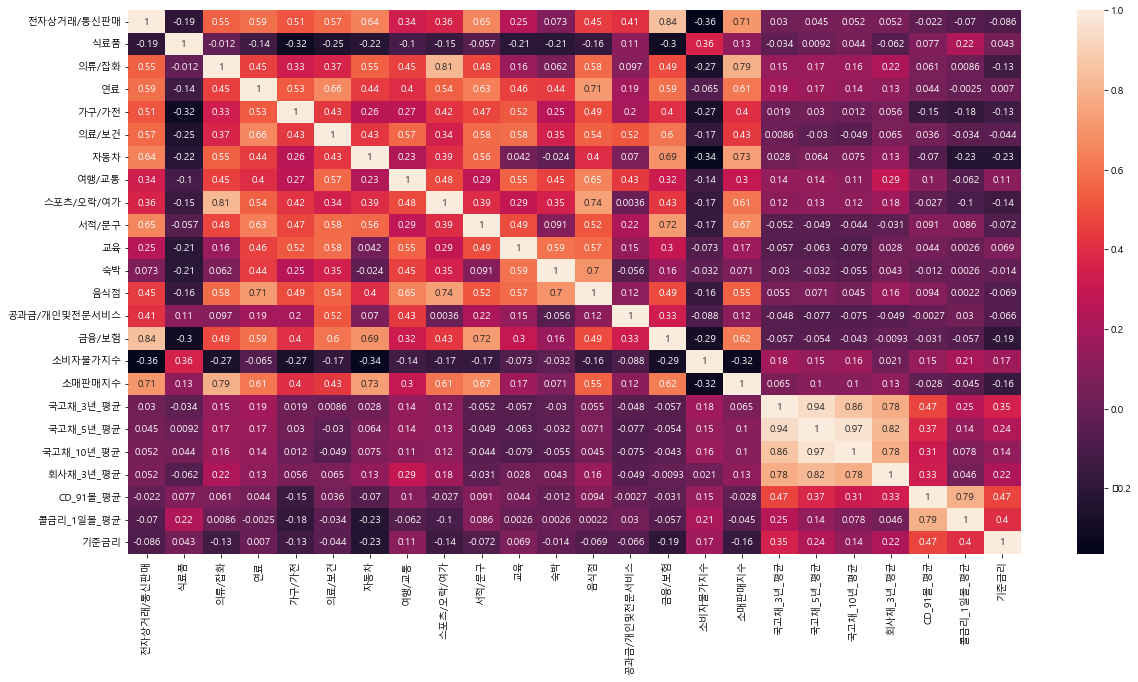

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
plt.figure(figsize=(20,10))
sns.heatmap(total_df1.corr(),annot=True)

### 정규성 검정

In [55]:
from scipy import stats
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

In [56]:
shap_pct(total_df1)

전자상거래/통신판매 의 pvalue: 0.31959614157676697
식료품 의 pvalue: 0.04639626666903496
의류/잡화 의 pvalue: 0.0001094810213544406
연료 의 pvalue: 0.10305468738079071
가구/가전 의 pvalue: 0.025769131258130074
의료/보건 의 pvalue: 0.23985372483730316
자동차 의 pvalue: 0.09779869765043259
여행/교통 의 pvalue: 3.55143333763408e-06
스포츠/오락/여가 의 pvalue: 2.2303004243440228e-06
서적/문구 의 pvalue: 1.8613231134168018e-07
교육 의 pvalue: 0.00784806814044714
숙박 의 pvalue: 0.6277390718460083
음식점 의 pvalue: 0.2686583697795868
공과금/개인및전문서비스 의 pvalue: 0.0343366302549839
금융/보험 의 pvalue: 0.00027949322247877717
소비자물가지수 의 pvalue: 0.6116564273834229
소매판매지수 의 pvalue: 0.6854149103164673
국고채_3년_평균 의 pvalue: 0.0005322760553099215
국고채_5년_평균 의 pvalue: 0.00025925261434167624
국고채_10년_평균 의 pvalue: 0.011288688518106937
회사채_3년_평균 의 pvalue: 5.761821739724837e-06
CD_91몰_평균 의 pvalue: 2.937751020226642e-08
콜금리_1일몰_평균 의 pvalue: 2.2003622882071916e-13
기준금리 의 pvalue: 4.606051016244353e-18


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='식료품', ylabel='Density'>

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


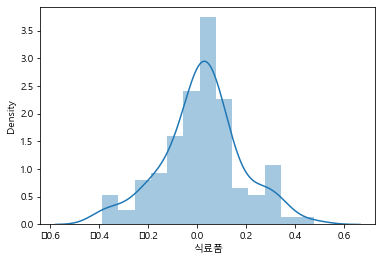

In [57]:
sns.distplot(total_df1['식료품'])

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

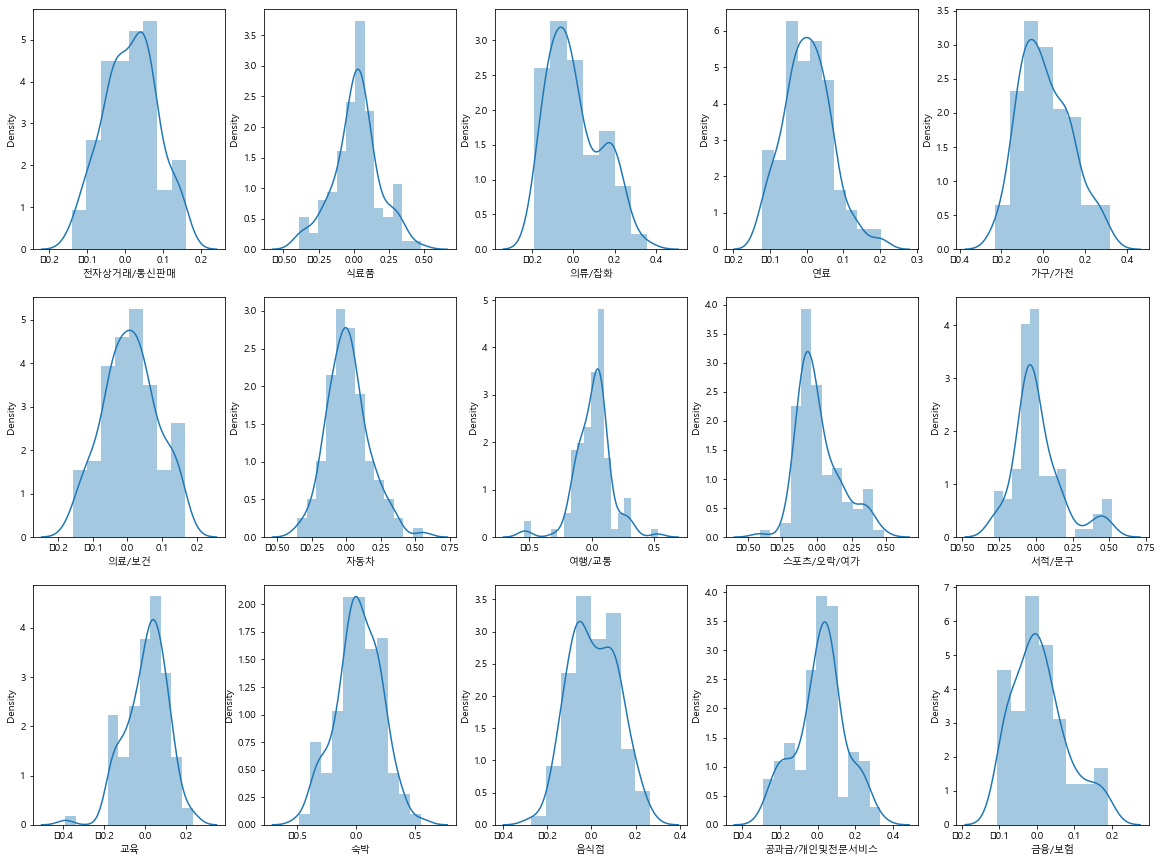

In [58]:
# 정규성 히스토그램
from matplotlib.pyplot import imread



fig, axes = plt.subplots(3, 5)
fig.set_size_inches((20,15))

sns.distplot(total_df1["전자상거래/통신판매"], ax=axes[0,0])
sns.distplot(total_df1["식료품"], ax=axes[0,1])
sns.distplot(total_df1["의류/잡화"], ax=axes[0,2])
sns.distplot(total_df1["연료"], ax=axes[0,3])
sns.distplot(total_df1["가구/가전"], ax=axes[0,4])
sns.distplot(total_df1["의료/보건"], ax=axes[1,0])
sns.distplot(total_df1["자동차"], ax=axes[1,1])
sns.distplot(total_df1["여행/교통"], ax=axes[1,2])
sns.distplot(total_df1["스포츠/오락/여가"], ax=axes[1,3])
sns.distplot(total_df1["서적/문구"], ax=axes[1,4])
sns.distplot(total_df1["교육"], ax=axes[2,0])
sns.distplot(total_df1["숙박"], ax=axes[2,1])
sns.distplot(total_df1["음식점"], ax=axes[2,2])
sns.distplot(total_df1['공과금/개인및전문서비스'], ax=axes[2,3])
sns.distplot(total_df1['금융/보험'], ax=axes[2,4])

plt.show()

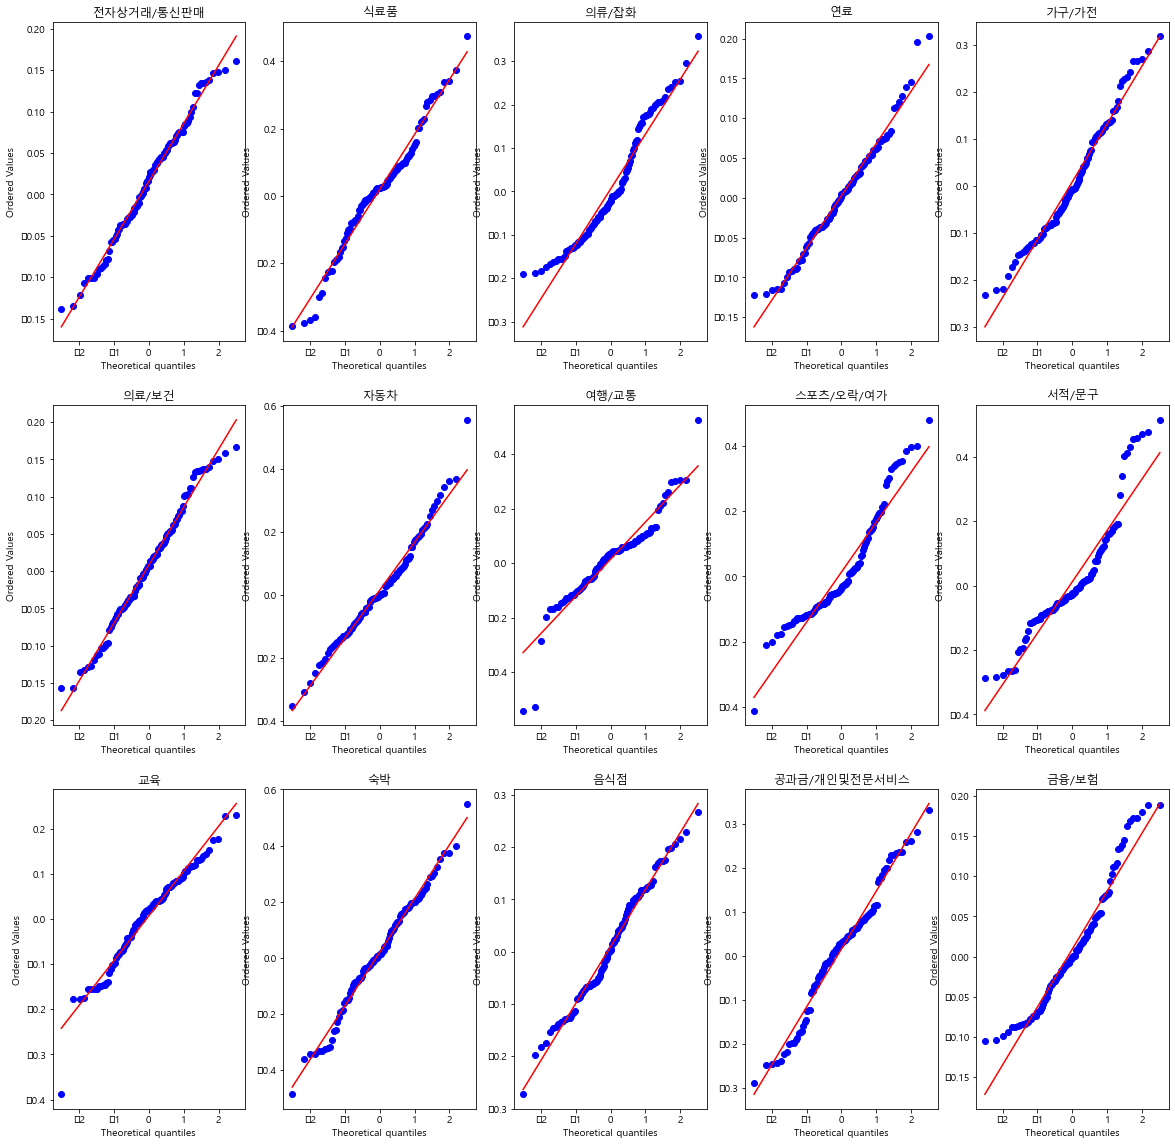

In [59]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread



fig, axes = plt.subplots(3, 5)
fig.set_size_inches((20,20))


stats.probplot(total_df1["전자상거래/통신판매"], dist=stats.norm, plot=axes[0,0])
axes[0,0].title.set_text("전자상거래/통신판매")
stats.probplot(total_df1["식료품"], dist=stats.norm, plot=axes[0,1])
axes[0,1].title.set_text("식료품")
stats.probplot(total_df1["의류/잡화"], dist=stats.norm, plot=axes[0,2])
axes[0,2].title.set_text("의류/잡화")
stats.probplot(total_df1["연료"], dist=stats.norm, plot=axes[0,3])
axes[0,3].title.set_text("연료")
stats.probplot(total_df1["가구/가전"], dist=stats.norm, plot=axes[0,4])
axes[0,4].title.set_text("가구/가전")
stats.probplot(total_df1["의료/보건"], dist=stats.norm, plot=axes[1,0])
axes[1,0].title.set_text("의료/보건")
stats.probplot(total_df1["자동차"], dist=stats.norm, plot=axes[1,1])
axes[1,1].title.set_text("자동차")
stats.probplot(total_df1["여행/교통"], dist=stats.norm, plot=axes[1,2])
axes[1,2].title.set_text("여행/교통")
stats.probplot(total_df1["스포츠/오락/여가"], dist=stats.norm, plot=axes[1,3])
axes[1,3].title.set_text("스포츠/오락/여가")
stats.probplot(total_df1["서적/문구"], dist=stats.norm, plot=axes[1,4])
axes[1,4].title.set_text("서적/문구")
stats.probplot(total_df1["교육"], dist=stats.norm, plot=axes[2,0])
axes[2,0].title.set_text("교육")
stats.probplot(total_df1["숙박"], dist=stats.norm, plot=axes[2,1])
axes[2,1].title.set_text("숙박")
stats.probplot(total_df1["음식점"], dist=stats.norm, plot=axes[2,2])
axes[2,2].title.set_text("음식점")
stats.probplot(total_df1['공과금/개인및전문서비스'], dist=stats.norm, plot=axes[2,3])
axes[2,3].title.set_text("공과금/개인및전문서비스")
stats.probplot(total_df1['금융/보험'], dist=stats.norm, plot=axes[2,4])
axes[2,4].title.set_text("금융/보험")

plt.show()

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


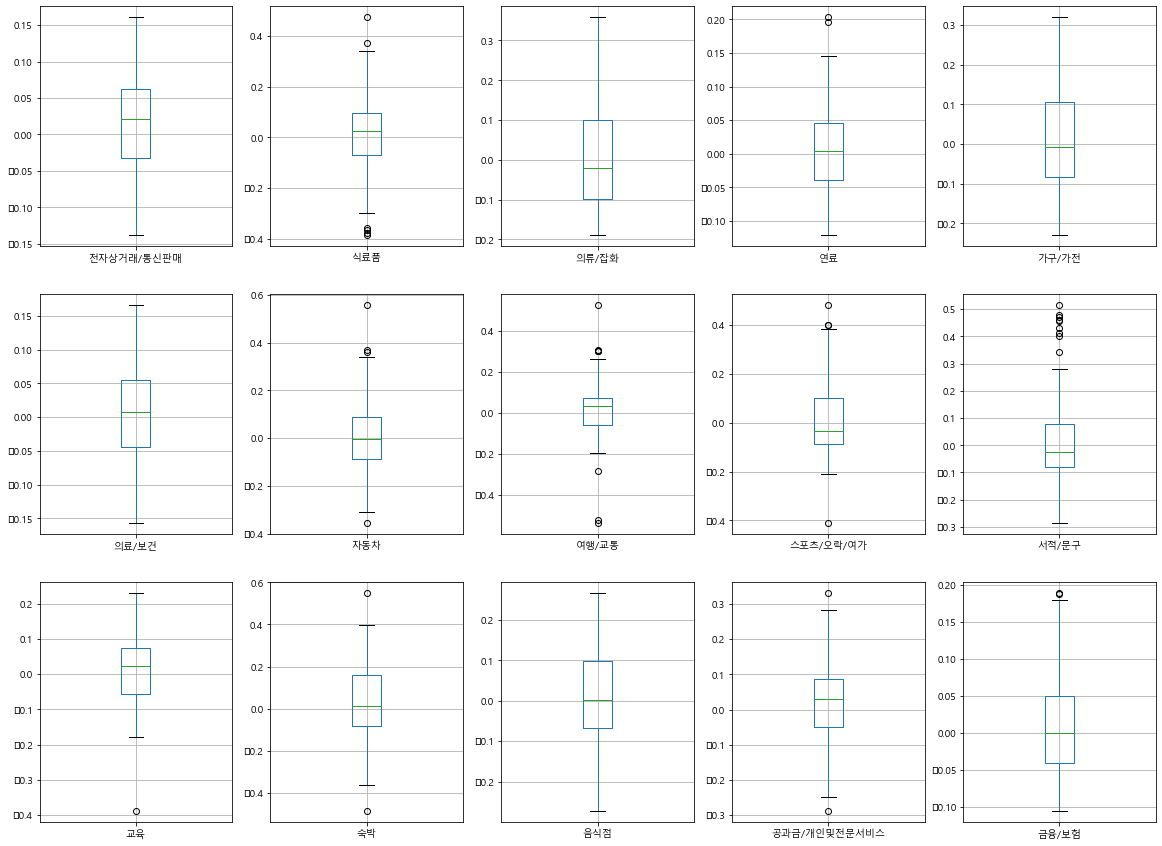

In [60]:
# 이상치 박스플롯
from matplotlib.pyplot import imread

fig, axes = plt.subplots(3, 5)
fig.set_size_inches((20,15))


total_df1.boxplot(column="전자상거래/통신판매", ax=axes[0,0])
total_df1.boxplot(column="식료품", ax=axes[0,1])
total_df1.boxplot(column="의류/잡화", ax=axes[0,2])
total_df1.boxplot(column="연료", ax=axes[0,3])
total_df1.boxplot(column="가구/가전", ax=axes[0,4])
total_df1.boxplot(column="의료/보건", ax=axes[1,0])
total_df1.boxplot(column="자동차", ax=axes[1,1])
total_df1.boxplot(column="여행/교통", ax=axes[1,2])
total_df1.boxplot(column="스포츠/오락/여가", ax=axes[1,3])
total_df1.boxplot(column="서적/문구", ax=axes[1,4])
total_df1.boxplot(column="교육", ax=axes[2,0])
total_df1.boxplot(column="숙박", ax=axes[2,1])
total_df1.boxplot(column="음식점", ax=axes[2,2])
total_df1.boxplot(column="공과금/개인및전문서비스", ax=axes[2,3])
total_df1.boxplot(column="금융/보험", ax=axes[2,4])

plt.show()

### IQR

In [61]:
cols = []

total_df1_iqr = total_df1.copy()
total_df1_iqr = total_df1_iqr[['전자상거래/통신판매', '식료품','의류/잡화', 
'연료','가구/가전', '의료/보건', '자동차', '여행/교통', '스포츠/오락/여가', '서적/문구', '교육','숙박','음식점'
,'공과금/개인및전문서비스', '금융/보험']]
cols.append([col for col in total_df1_iqr])

Q1 = total_df1_iqr[['전자상거래/통신판매', '식료품','의류/잡화', 
'연료','가구/가전', '의료/보건', '자동차', '여행/교통', '스포츠/오락/여가', '서적/문구', '교육','숙박','음식점'
,'공과금/개인및전문서비스', '금융/보험']].quantile(q=0.25)

Q3 = total_df1_iqr[['전자상거래/통신판매', '식료품','의류/잡화', 
'연료','가구/가전', '의료/보건', '자동차', '여행/교통', '스포츠/오락/여가', '서적/문구', '교육','숙박','음식점'
,'공과금/개인및전문서비스', '금융/보험']].quantile(q=0.75)

IQR = Q3 - Q1
for i in cols:
    total_df1_iqr[i] = total_df1_iqr[i][(total_df1_iqr[i] <= Q3[i]+1.5*IQR[i]) & (total_df1_iqr[i] >= Q1[i]-1.5*IQR[i])]

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


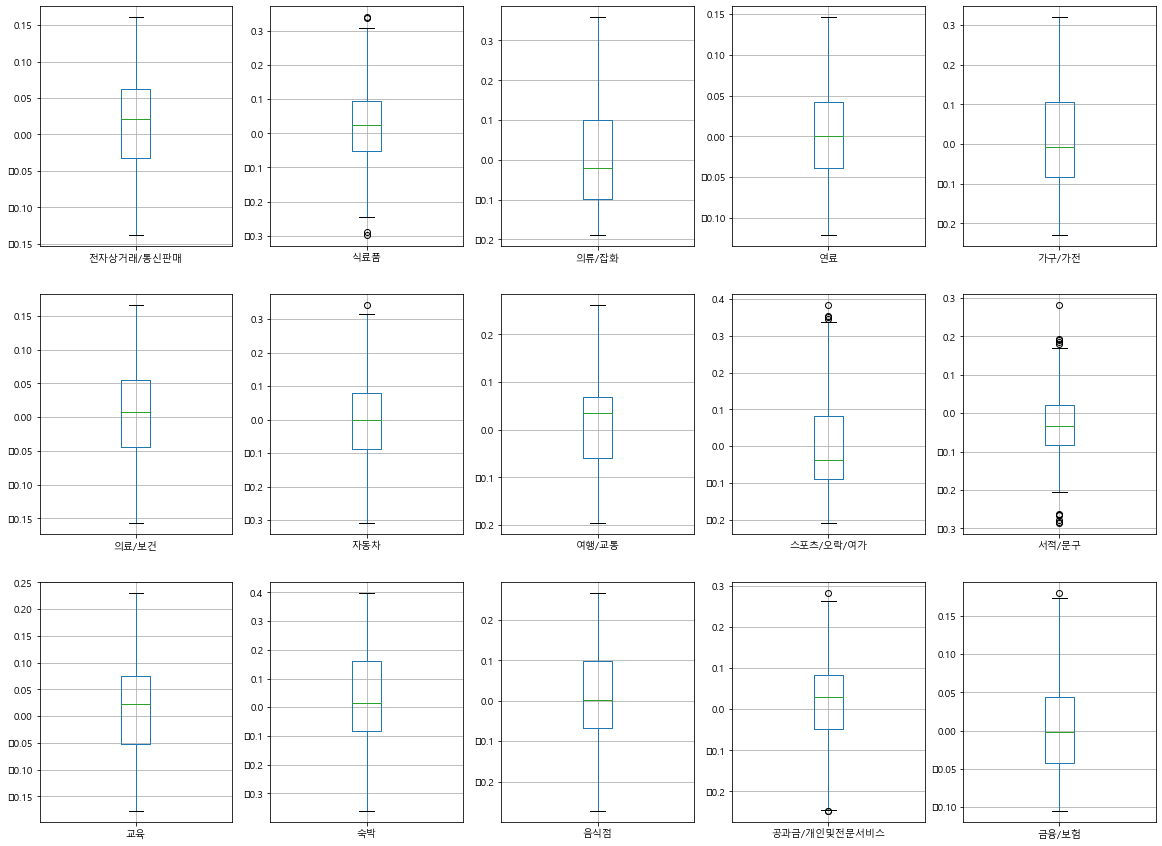

In [63]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(3, 5)
fig.set_size_inches((20,15))


total_df1_iqr.boxplot(column="전자상거래/통신판매", ax=axes[0,0])
total_df1_iqr.boxplot(column="식료품", ax=axes[0,1])
total_df1_iqr.boxplot(column="의류/잡화", ax=axes[0,2])
total_df1_iqr.boxplot(column="연료", ax=axes[0,3])
total_df1_iqr.boxplot(column="가구/가전", ax=axes[0,4])
total_df1_iqr.boxplot(column="의료/보건", ax=axes[1,0])
total_df1_iqr.boxplot(column="자동차", ax=axes[1,1])
total_df1_iqr.boxplot(column="여행/교통", ax=axes[1,2])
total_df1_iqr.boxplot(column="스포츠/오락/여가", ax=axes[1,3])
total_df1_iqr.boxplot(column="서적/문구", ax=axes[1,4])
total_df1_iqr.boxplot(column="교육", ax=axes[2,0])
total_df1_iqr.boxplot(column="숙박", ax=axes[2,1])
total_df1_iqr.boxplot(column="음식점", ax=axes[2,2])
total_df1_iqr.boxplot(column="공과금/개인및전문서비스", ax=axes[2,3])
total_df1_iqr.boxplot(column="금융/보험", ax=axes[2,4])

plt.show()

### 이상해서 이상치 한번더

In [64]:
cols = []

total_df2_iqr = total_df1_iqr.copy()
total_df2_iqr = total_df2_iqr[['전자상거래/통신판매', '식료품','의류/잡화', 
'연료','가구/가전', '의료/보건', '자동차', '여행/교통', '스포츠/오락/여가', '서적/문구', '교육','숙박','음식점'
,'공과금/개인및전문서비스', '금융/보험']]
cols.append([col for col in total_df2_iqr])

Q1 = total_df2_iqr[['전자상거래/통신판매', '식료품','의류/잡화', 
'연료','가구/가전', '의료/보건', '자동차', '여행/교통', '스포츠/오락/여가', '서적/문구', '교육','숙박','음식점'
,'공과금/개인및전문서비스', '금융/보험']].quantile(q=0.25)

Q3 = total_df2_iqr[['전자상거래/통신판매', '식료품','의류/잡화', 
'연료','가구/가전', '의료/보건', '자동차', '여행/교통', '스포츠/오락/여가', '서적/문구', '교육','숙박','음식점'
,'공과금/개인및전문서비스', '금융/보험']].quantile(q=0.75)

IQR = Q3 - Q1
for i in cols:
    total_df2_iqr[i] = total_df2_iqr[i][(total_df2_iqr[i] <= Q3[i]+1.5*IQR[i]) & (total_df2_iqr[i] >= Q1[i]-1.5*IQR[i])]

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


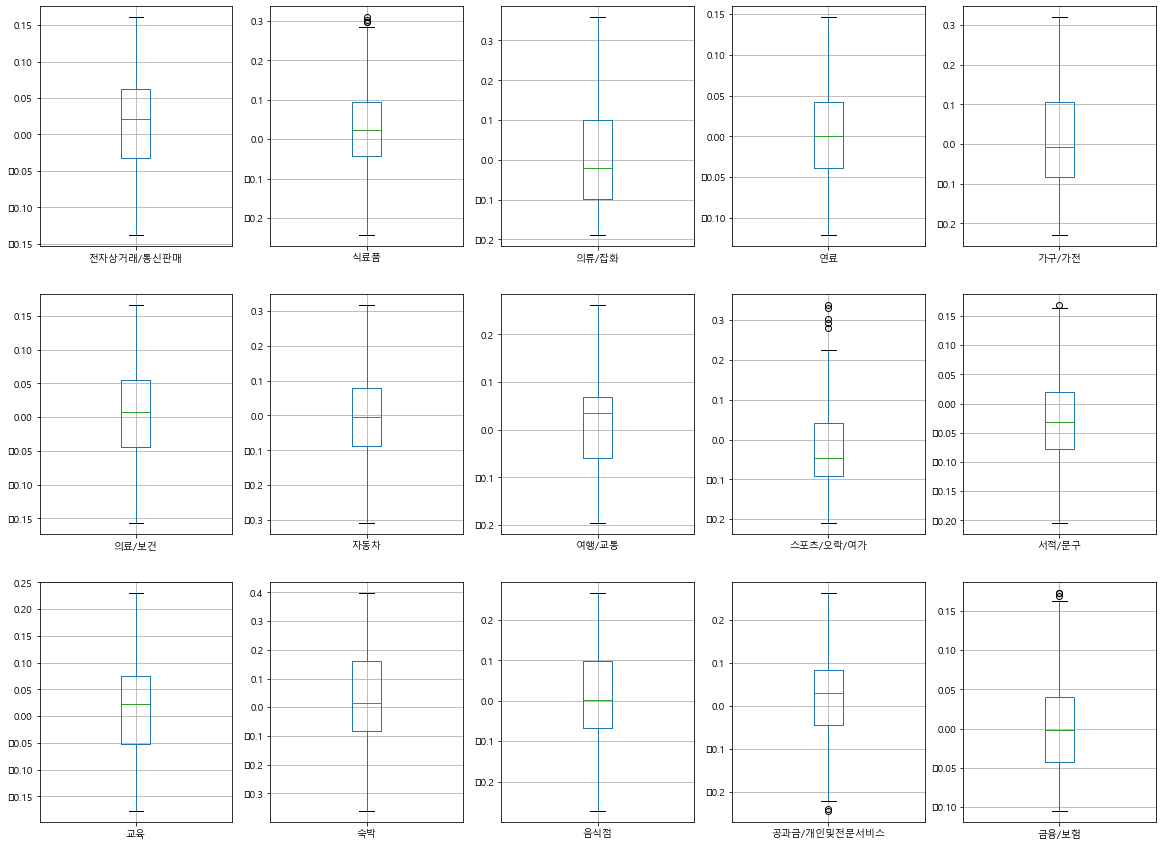

In [66]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(3, 5)
fig.set_size_inches((20,15))


total_df2_iqr.boxplot(column="전자상거래/통신판매", ax=axes[0,0])
total_df2_iqr.boxplot(column="식료품", ax=axes[0,1])
total_df2_iqr.boxplot(column="의류/잡화", ax=axes[0,2])
total_df2_iqr.boxplot(column="연료", ax=axes[0,3])
total_df2_iqr.boxplot(column="가구/가전", ax=axes[0,4])
total_df2_iqr.boxplot(column="의료/보건", ax=axes[1,0])
total_df2_iqr.boxplot(column="자동차", ax=axes[1,1])
total_df2_iqr.boxplot(column="여행/교통", ax=axes[1,2])
total_df2_iqr.boxplot(column="스포츠/오락/여가", ax=axes[1,3])
total_df2_iqr.boxplot(column="서적/문구", ax=axes[1,4])
total_df2_iqr.boxplot(column="교육", ax=axes[2,0])
total_df2_iqr.boxplot(column="숙박", ax=axes[2,1])
total_df2_iqr.boxplot(column="음식점", ax=axes[2,2])
total_df2_iqr.boxplot(column="공과금/개인및전문서비스", ax=axes[2,3])
total_df2_iqr.boxplot(column="금융/보험", ax=axes[2,4])

plt.show()

In [67]:
# 이상치 인덱스

q1 = total_df1_iqr['식료품'].quantile(0.25)
q3 = total_df1_iqr['식료품'].quantile(0.75)
iqr = q3-q1

condition1 = total_df1_iqr['식료품']>q3+1.5*iqr
condition2 = total_df1_iqr['식료품']<q1-1.5*iqr
a = total_df1_iqr[condition1].index
b = total_df1_iqr[condition2].index

print(a)
print(b)

Index(['2015-09', '2020-09'], dtype='object', name='날짜')
Index(['2015-10', '2018-10'], dtype='object', name='날짜')


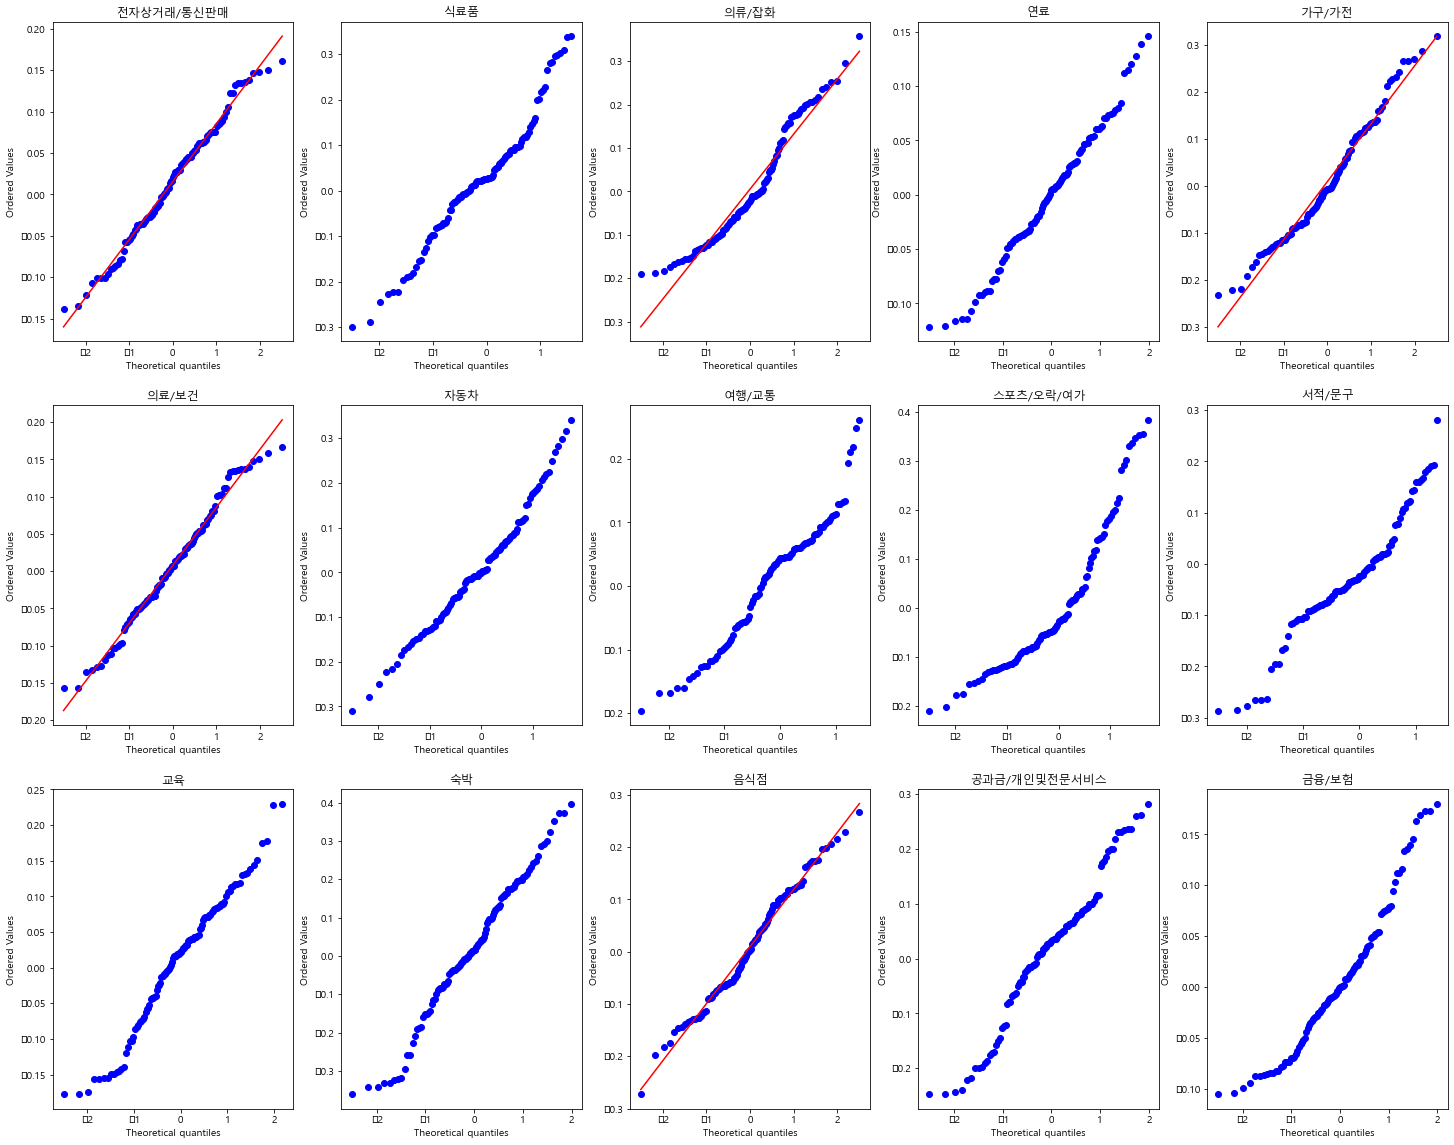

In [69]:
from matplotlib.pyplot import imread



fig, axes = plt.subplots(3, 5)
fig.set_size_inches((25,20))


stats.probplot(total_df1_iqr["전자상거래/통신판매"], dist=stats.norm, plot=axes[0,0])
axes[0,0].title.set_text("전자상거래/통신판매")
stats.probplot(total_df1_iqr["식료품"], dist=stats.norm, plot=axes[0,1])
axes[0,1].title.set_text("식료품")
stats.probplot(total_df1_iqr["의류/잡화"], dist=stats.norm, plot=axes[0,2])
axes[0,2].title.set_text("의류/잡화")
stats.probplot(total_df1_iqr["연료"], dist=stats.norm, plot=axes[0,3])
axes[0,3].title.set_text("연료")
stats.probplot(total_df1_iqr["가구/가전"], dist=stats.norm, plot=axes[0,4])
axes[0,4].title.set_text("가구/가전")
stats.probplot(total_df1_iqr["의료/보건"], dist=stats.norm, plot=axes[1,0])
axes[1,0].title.set_text("의료/보건")
stats.probplot(total_df1_iqr["자동차"], dist=stats.norm, plot=axes[1,1])
axes[1,1].title.set_text("자동차")
stats.probplot(total_df1_iqr["여행/교통"], dist=stats.norm, plot=axes[1,2])
axes[1,2].title.set_text("여행/교통")
stats.probplot(total_df1_iqr["스포츠/오락/여가"], dist=stats.norm, plot=axes[1,3])
axes[1,3].title.set_text("스포츠/오락/여가")
stats.probplot(total_df1_iqr["서적/문구"], dist=stats.norm, plot=axes[1,4])
axes[1,4].title.set_text("서적/문구")
stats.probplot(total_df1_iqr["교육"], dist=stats.norm, plot=axes[2,0])
axes[2,0].title.set_text("교육")
stats.probplot(total_df1_iqr["숙박"], dist=stats.norm, plot=axes[2,1])
axes[2,1].title.set_text("숙박")
stats.probplot(total_df1_iqr["음식점"], dist=stats.norm, plot=axes[2,2])
axes[2,2].title.set_text("음식점")
stats.probplot(total_df1_iqr['공과금/개인및전문서비스'], dist=stats.norm, plot=axes[2,3])
axes[2,3].title.set_text("공과금/개인및전문서비스")
stats.probplot(total_df1_iqr['금융/보험'], dist=stats.norm, plot=axes[2,4])
axes[2,4].title.set_text("금융/보험")

plt.show()

In [170]:
df_book = total_df1[['서적/문구','소비자물가지수','소매판매지수']]

In [70]:
#pd.options.display.max_rows = None

In [171]:
df_book

,서적/문구,소비자물가지수,소매판매지수
날짜,,,
2012-12,0.082349,0.001782,0.023590
2013-01,-0.069289,0.005999,-0.086172
2013-02,-0.011394,0.003343,-0.048246
2013-03,0.328746,-0.000924,0.078341
2013-04,-0.178358,-0.001388,-0.018162
2013-05,-0.133033,0.000000,0.052231
2013-06,-0.048942,-0.001217,-0.036194
2013-07,0.122933,0.002146,0.022532
2013-08,-0.088333,0.003541,-0.044071


In [177]:
df_book['서적/문구'].describe()

count    85.000000
mean      0.010568
std       0.140158
min      -0.262316
25%      -0.066467
50%      -0.011394
75%       0.082349
max       0.368150
Name: 서적/문구, dtype: float64

In [178]:
df_book.reset_index(level='날짜', inplace=True)

In [179]:
# 3월에 점수 1을 준다
def month_encoding(month):
    score = ""
    if month.endswith("03") : score = 1
    else : score = 0
    return score

In [180]:
#df_book["날짜"] = df_book["날짜"].astype(str)
df_book["점수"] = df_book["날짜"].apply(lambda x: month_encoding(x))

C:\Users\82104\AppData\Local\Temp\ipykernel_23144\522537286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_book["점수"] = df_book["날짜"].apply(lambda x: month_encoding(x))


In [181]:
import numpy as np

df_book["날짜"] = df_book["날짜"].astype(str)
df_book["소비"] = ""

for i in range(0, 13):
    for j in range(12, 85):
        if df_book.loc[i,"서적/문구"] > 0: 
            if df_book.loc[i,"소비자물가지수"] <= df_book["소비자물가지수"].quantile(q=0.75): 
                if df_book.loc[i,"소매판매지수"] >= df_book["소매판매지수"].quantile(q=0.25):
                    df_book.loc[i,"소비"] = 1
            elif df_book.loc[i,"소비자물가지수"] > df_book["소비자물가지수"].quantile(q=0.75):
                if df_book.loc[i,"소매판매지수"] < df_book["소매판매지수"].quantile(q=0.25):
                    df_book.loc[i,"소비"] = 0

        elif df_book.loc[i, "서적/문구"] <= 0:
            if df_book.loc[i,"소비자물가지수"] > df_book["소비자물가지수"].quantile(q=0.25): 
                if df_book.loc[i,"소매판매지수"] < df_book["소매판매지수"].quantile(q=0.75):
                    df_book.loc[i,"소비"] = 0
                else:
                    df_book.loc[i,"소비"] = 1
            elif df_book.loc[i,"소비자물가지수"] <= df_book["소비자물가지수"].quantile(q=0.25):
                if df_book.loc[i,"소매판매지수"] > df_book["소매판매지수"].quantile(q=0.75):
                    df_book.loc[i,"소비"] = 1
                else:
                    df_book.loc[i,"소비"] = 0


        if df_book["서적/문구"].loc[j] > 0:
            if df_book["서적/문구"].loc[j-12] > 0:
                if df_book["서적/문구"].loc[j] > df_book["서적/문구"].loc[j-12]:
                    df_book.loc[j,"소비"] = 1
                elif df_book["서적/문구"].loc[j] < df_book["서적/문구"].loc[j-12]:
                    if df_book["서적/문구"].loc[j] > ((df_book["서적/문구"].loc[j-12])/(1/2)):                        
                        if df_book.loc[j,"소비자물가지수"] <= df_book["소비자물가지수"].quantile(q=0.50): 
                            if df_book.loc[j,"소매판매지수"] >= df_book["소매판매지수"].quantile(q=0.25):
                                df_book.loc[j,"소비"] = 1
                        elif df_book.loc[j,"소비자물가지수"] > df_book["소비자물가지수"].quantile(q=0.50):
                            if df_book.loc[j,"소매판매지수"] >= df_book["소매판매지수"].quantile(q=0.50):
                                df_book.loc[j,"소비"] = 1
                        elif df_book.loc[j,"소비자물가지수"] > df_book["소비자물가지수"].quantile(q=0.50):
                            if df_book.loc[j,"소매판매지수"] < df_book["소매판매지수"].quantile(q=0.50):
                                df_book.loc[j,"소비"] = 0 
                                
            elif df_book["서적/문구"].loc[j-12] < 0:
                if df_book["서적/문구"].loc[j] > ((df_book["서적/문구"].loc[j-12])/(1/2)):
                    if df_book.loc[j,'소비자물가지수'] <= 0.001091:
                        if df_book.loc[j,'소매판매지수'] >= 0.009050:
                            df_book.loc[j,"소비"] = 1
                        elif df_book.loc[j,"소비자물가지수"] > 0.001091:
                            if df_book.loc[j,"소매판매지수"] >= 0.009050:
                                df_book.loc[j,"소비"] = 1
                        elif df_book.loc[j,"소비자물가지수"] > 0.001091:
                            if df_book.loc[j,"소매판매지수"] < 0.009050:
                                df_book.loc[j,"소비"] = 0
                                
        elif df_book["서적/문구"].loc[j] <= 0:
            if df_book["서적/문구"].loc[j-12] <= 0:
                if df_book["서적/문구"].loc[j] > df_book["서적/문구"].loc[j-12]:
                    if df_book.loc[j, "서적/문구"] > -0.024028:
                        if df_book.loc[j,"소비자물가지수"] <= np.mean(df_book["소비자물가지수"]): 
                            if df_book.loc[j,"소매판매지수"] >= np.mean(df_book["소매판매지수"]):
                                df_book.loc[j,"소비"] = 1
                        elif df_book.loc[j,"소비자물가지수"] > np.mean(df_book["소비자물가지수"]):
                            if df_book.loc[j,"소매판매지수"] >= np.mean(df_book["소매판매지수"]):
                                df_book.loc[j,"소비"] = 1
                        elif df_book.loc[j,"소비자물가지수"] > np.mean(df_book["소비자물가지수"]):
                            if df_book.loc[j,"소매판매지수"] < np.mean(df_book["소매판매지수"]):    
                                df_book.loc[j,"소비"] = 0
                    else:
                        df_book.loc[j,'소비'] = 0
                elif df_book["서적/문구"].loc[j] < df_book["서적/문구"].loc[j-12]:
                    df_book.loc[j,"소비"] = 0
df_book

C:\Users\82104\AppData\Local\Temp\ipykernel_23144\167478150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_book["날짜"] = df_book["날짜"].astype(str)
C:\Users\82104\AppData\Local\Temp\ipykernel_23144\167478150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_book["소비"] = ""


,날짜,서적/문구,소비자물가지수,소매판매지수,점수,소비
0,2012-12,0.082349,0.001782,0.023590,0,1
1,2013-01,-0.069289,0.005999,-0.086172,0,0
2,2013-02,-0.011394,0.003343,-0.048246,0,0
3,2013-03,0.328746,-0.000924,0.078341,1,1
4,2013-04,-0.178358,-0.001388,-0.018162,0,0
5,2013-05,-0.133033,0.000000,0.052231,0,1
6,2013-06,-0.048942,-0.001217,-0.036194,0,0
7,2013-07,0.122933,0.002146,0.022532,0,1
8,2013-08,-0.088333,0.003541,-0.044071,0,0
9,2013-09,0.048082,0.001941,0.031833,0,1


<AxesSubplot:xlabel='날짜'>

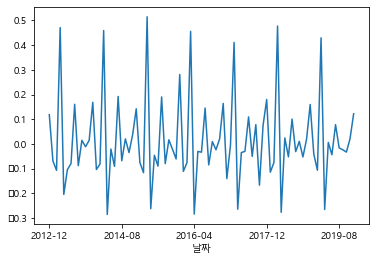

In [27]:
total_df1['전국_서적/문구'].plot()

In [28]:
total_df1_iqr['전국_서적/문구'].describe()

count    78.000000
mean     -0.024443
std       0.118805
min      -0.286140
25%      -0.084219
50%      -0.032329
75%       0.020977
max       0.281181
Name: 전국_서적/문구, dtype: float64

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


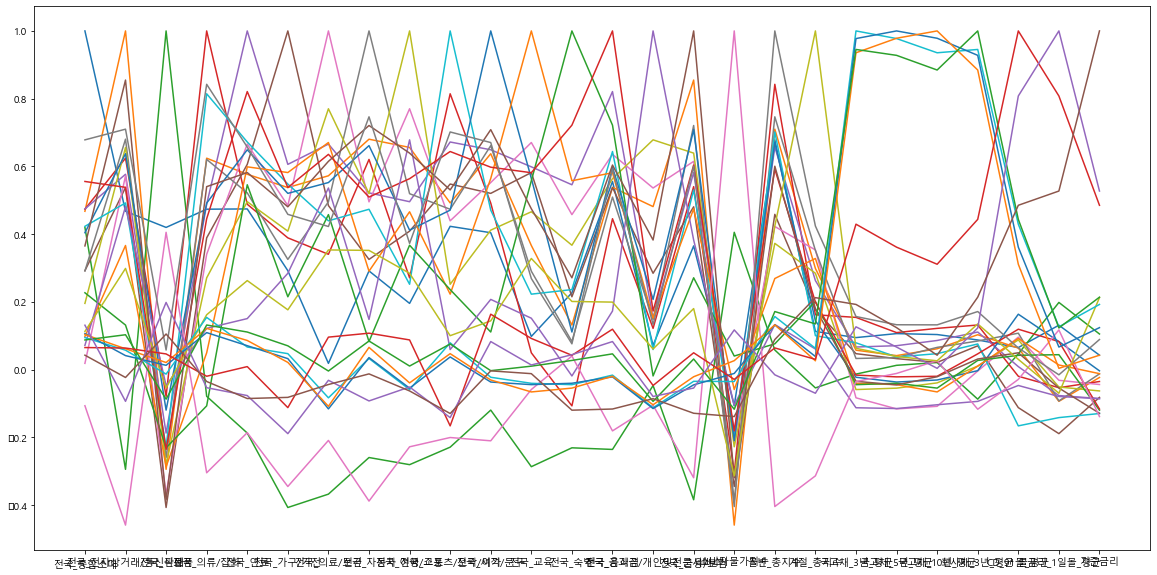

In [33]:
plt.figure(figsize=(20,10))
plt.plot(total_df1.corr())
plt.show()

In [34]:
# 계절 나누는 함수
def seasons(s):
    if s.endswith("3") or s.endswith("4") or s.endswith("5"):
        return "봄"
    elif s.endswith("6") or s.endswith("7") or s.endswith("8"):
        return "여름"
    elif s.endswith("9") or s.endswith("10") or s.endswith("11"):
        return "가을"
    else:
        return "겨울"

In [35]:
# str 타입이 아니면 함수를 적용 못하기 때문에 데이터 타입 변경
total_df1 = total_df1.reset_index(level=0)
total_df1["날짜"] = total_df1["날짜"].astype(str)

In [36]:
# 계졀 나누는 함수 적용
total_df1["계절"] = total_df1["날짜"].apply(seasons)

In [37]:
# 계절 컬럼에 년도 추가
total_df1["계절"] = total_df1["날짜"].str[:4] + " " + total_df1["계절"]
total_df1 = total_df1.set_index('날짜')
total_df1.head()

,전국_종합소매,전국_전자상거래/통신판매,전국_식료품,전국_의류/잡화,전국_연료,전국_가구/가전,전국_의료/보건,전국_자동차,전국_여행/교통,전국_스포츠/오락/여가,...,불변_총지수,계절_총지수,국고채_3년_평균,국고채_5년_평균,국고채_10년_평균,회사채_3년_평균,CD_91몰_평균,콜금리_1일몰_평균,기준금리,계절
날짜,,,,,,,,,,,,,,,,,,,,,
2012-12,0.077909,0.027613,0.024488,-0.031449,-0.019097,-0.122218,-0.049408,0.192904,0.071612,-0.135839,...,0.023590,0.004228,0.017857,0.038328,0.046823,-0.006024,0.010526,0.000000,0.0,2012 겨울
2013-01,-0.109930,-0.047579,0.026437,-0.156039,-0.023171,-0.006880,0.134797,-0.309056,0.059998,-0.113972,...,-0.086172,-0.006316,-0.035088,-0.040268,-0.025559,-0.030303,-0.006944,0.003636,0.0,2013 겨울
2013-02,-0.063111,-0.138342,0.096626,-0.068648,-0.088923,-0.023821,-0.133135,0.037585,-0.141945,-0.150124,...,-0.048246,0.000000,-0.018182,-0.010490,-0.003279,-0.043750,-0.010490,-0.003623,0.0,2013 겨울
2013-03,0.029723,0.085685,-0.133374,0.183154,0.112232,0.270387,0.087816,0.223547,0.045869,0.355010,...,0.078341,-0.005297,-0.037037,-0.049470,-0.042763,-0.035948,-0.007067,-0.003636,0.0,2013 봄
2013-04,0.052395,0.045225,0.001931,-0.009763,-0.027114,-0.081842,-0.038601,0.004995,0.060437,0.028387,...,-0.018162,0.000000,-0.019231,-0.022305,-0.024055,-0.013559,-0.003559,0.003650,0.0,2013 봄


<AxesSubplot:xlabel='날짜'>

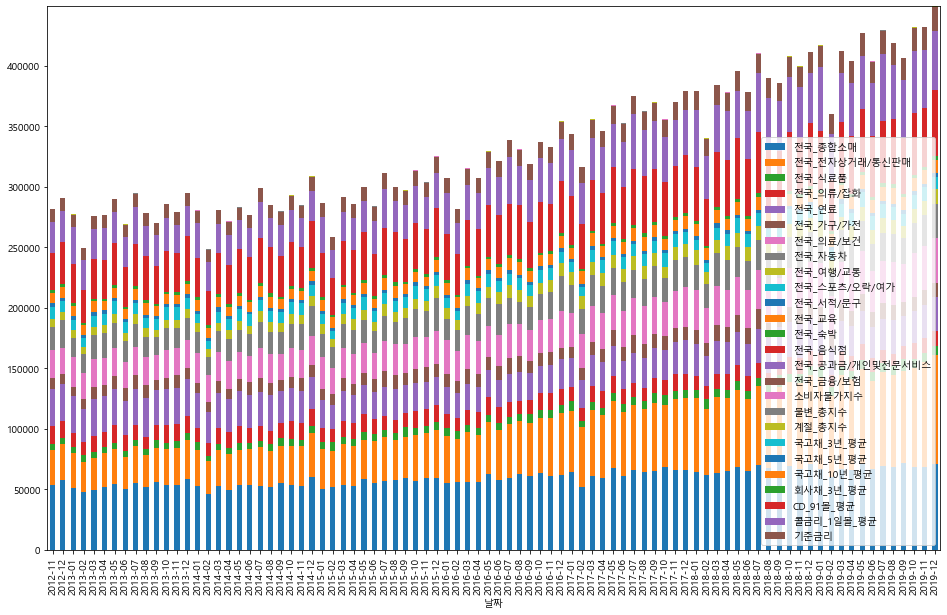

In [38]:
import matplotlib.pyplot as plt
import matplotlib

total_df.plot(kind='bar',figsize=(16,10),stacked=True)

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


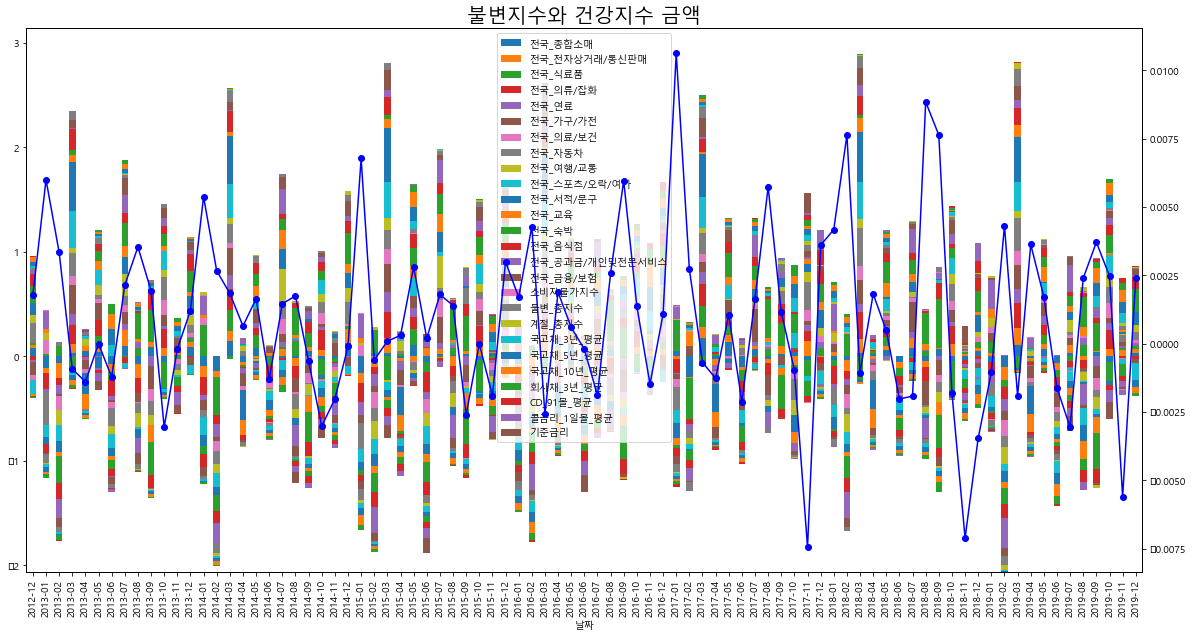

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####### 설정하기 ###
title = "불변지수와 건강지수 금액"
left_ax = total_df1
right_ax = total_df1['소비자물가지수']



fig, ax0 = plt.subplots(figsize = (20, 10))
ax1 = ax0.twinx()
plt.rc('font', family='Malgun Gothic')              # 한글 깨짐 오류 수정

# 그래프 생성
left_ax.plot(kind = 'bar', stacked = True, ax = ax0,)
right_ax.plot(kind ='line', secondary_y = True, ax = ax1,color='b',marker = 'o')

plt.title(title, fontsize = 20)
plt.show()

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####### 설정하기 ###
title = "불변지수등락률과 건강지수 등락률"
left_ax = df_hospital_b1[['전국_건강보조식품_등락률','전국_의료/보건_등락률','전국_종합병원_등락률','전국_일반병의원/기타의료기관_등락률']]
right_ax = df_hospital_b1['불변_총지수_등락률']



fig, ax0 = plt.subplots(figsize = (20, 10))
ax1 = ax0.twinx()
plt.rc('font', family='Malgun Gothic')              # 한글 깨짐 오류 수정

# 그래프 생성
left_ax.plot(kind = 'bar', stacked = True, ax = ax0,)
plt.legend(bbox_to_anchor=(1,1))
right_ax.plot(kind ='line', secondary_y = True, ax = ax1,color='b',marker = 'o')

plt.title(title, fontsize = 20)
plt.show()

NameError: name 'df_hospital_b1' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


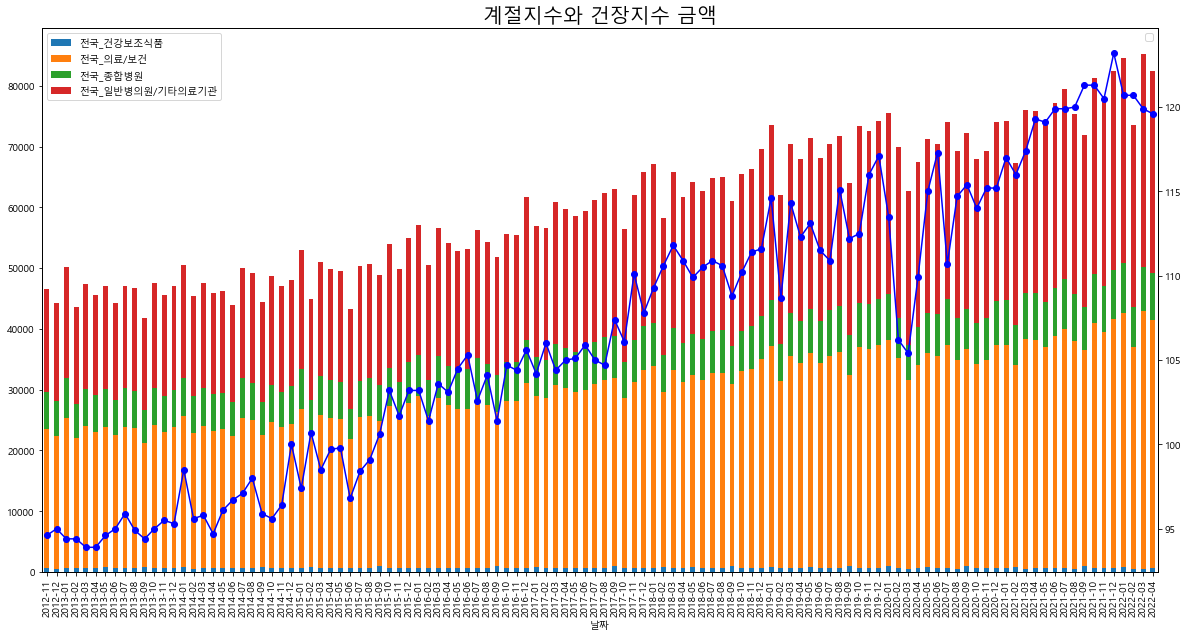

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####### 설정하기 ###
title = "계절지수와 건장지수 금액"
left_ax = df_hospital_s[['전국_건강보조식품','전국_의료/보건','전국_종합병원','전국_일반병의원/기타의료기관']]
right_ax = df_hospital_s['계절_총지수']



fig, ax0 = plt.subplots(figsize = (20, 10))
ax1 = ax0.twinx()
plt.rc('font', family='Malgun Gothic')              # 한글 깨짐 오류 수정

# 그래프 생성
left_ax.plot(kind = 'bar', stacked = True, ax = ax0,)
plt.legend(bbox_to_anchor=(1,1))
right_ax.plot(kind ='line', secondary_y = True, ax = ax1,color='b',marker = 'o')

plt.title(title, fontsize = 20)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


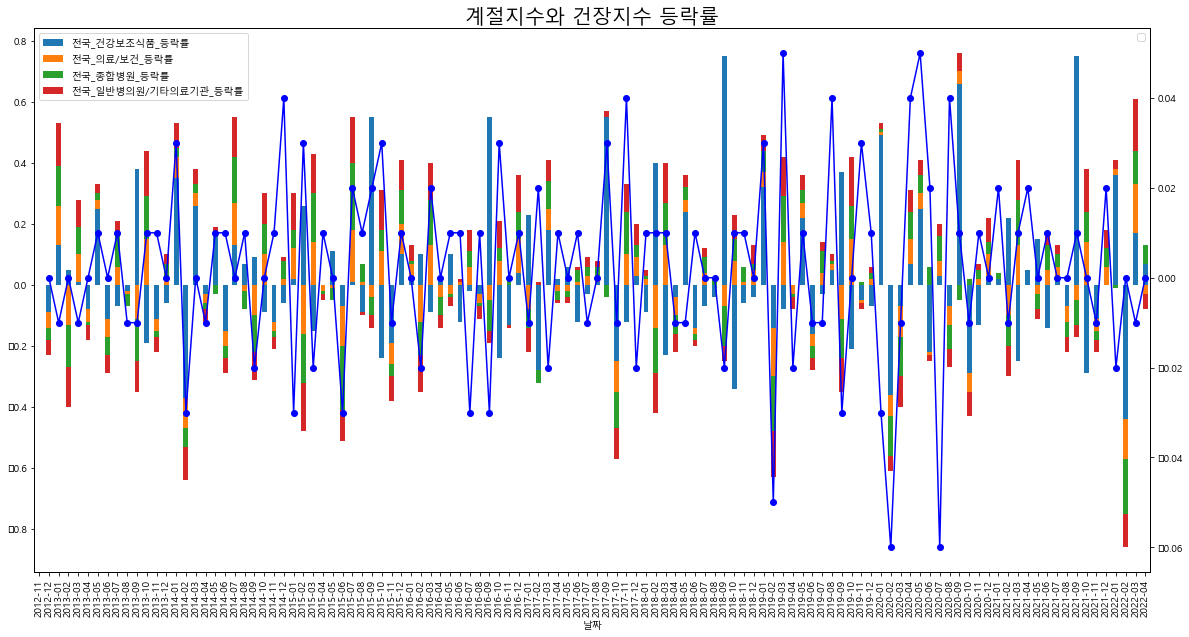

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####### 설정하기 ###
title = "계절지수와 건장지수 등락률"
left_ax = df_hospital_s1[['전국_건강보조식품_등락률','전국_의료/보건_등락률','전국_종합병원_등락률','전국_일반병의원/기타의료기관_등락률']]
right_ax = df_hospital_s1['계절_총지수_등락률']



fig, ax0 = plt.subplots(figsize = (20, 10))
ax1 = ax0.twinx()
plt.rc('font', family='Malgun Gothic')              # 한글 깨짐 오류 수정

# 그래프 생성
left_ax.plot(kind = 'bar', stacked = True, ax = ax0,)
plt.legend(bbox_to_anchor=(1,1))
right_ax.plot(kind ='line', secondary_y = True, ax = ax1,color='b',marker = 'o')

plt.title(title, fontsize = 20)
plt.show()

<AxesSubplot:>

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


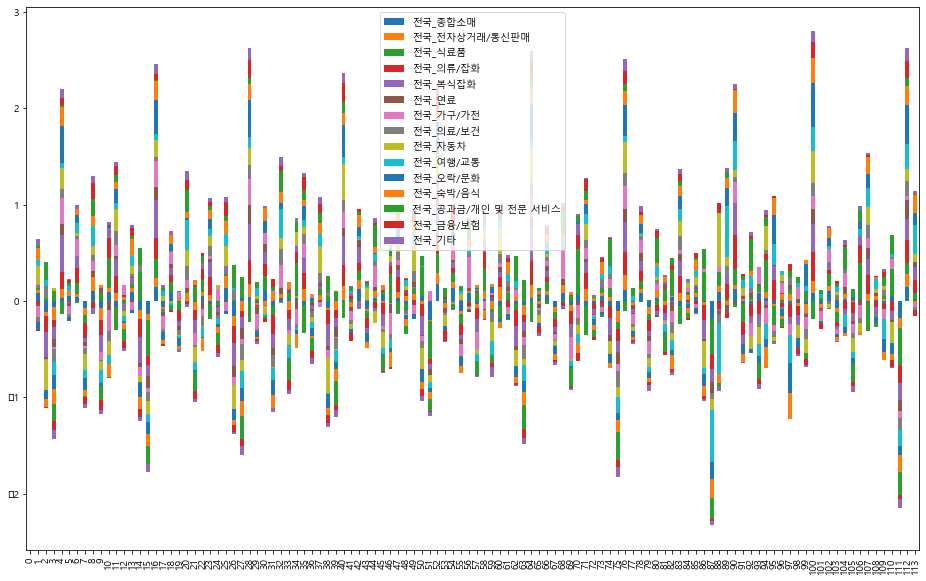

In [ ]:
df_t1.plot(kind='bar',figsize=(16,10),stacked=True)

<AxesSubplot:>

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


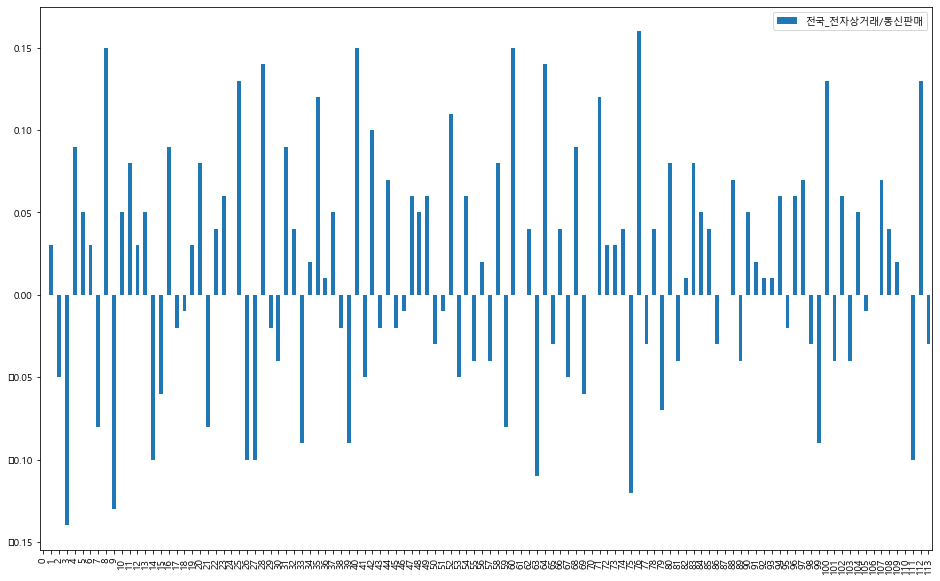

In [ ]:
df_on1.plot(kind='bar',stacked=True,figsize=(16,10))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


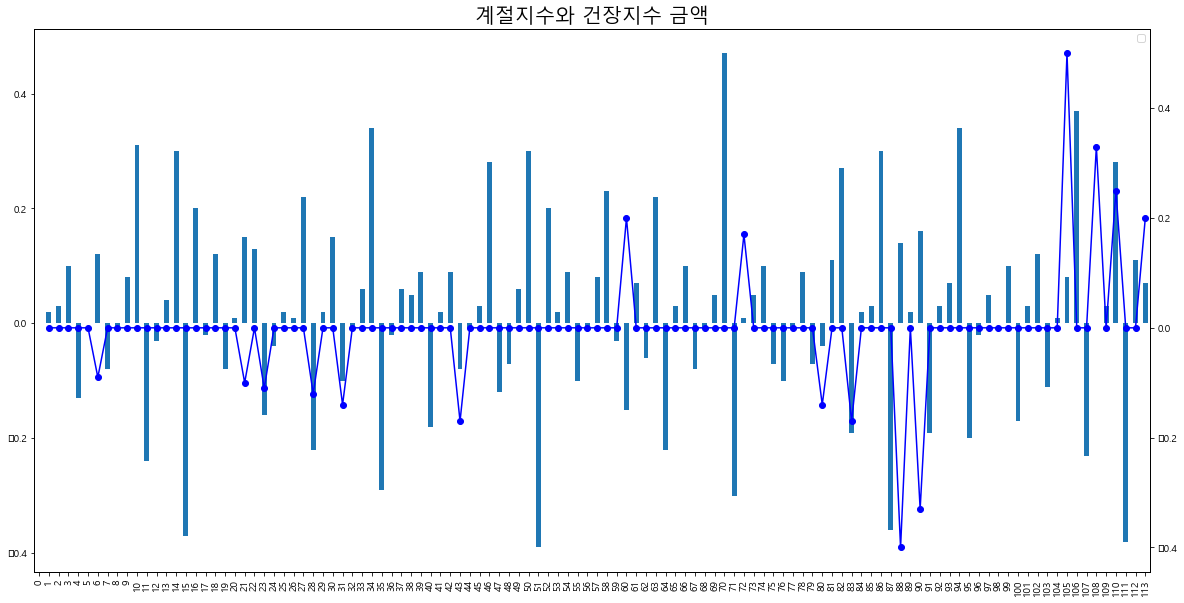

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####### 설정하기 ###
title = "계절지수와 건장지수 금액"
left_ax = df_nondura1['전국_식료품']
right_ax = interest_rates_df1['기준금리']



fig, ax0 = plt.subplots(figsize = (20, 10))
ax1 = ax0.twinx()
plt.rc('font', family='Malgun Gothic')              # 한글 깨짐 오류 수정

# 그래프 생성
left_ax.plot(kind = 'bar', stacked = True, ax = ax0,)
plt.legend(bbox_to_anchor=(1,1))
right_ax.plot(kind ='line', secondary_y = True, ax = ax1,color='b',marker = 'o')

plt.title(title, fontsize = 20)
plt.show()

In [ ]:
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='전국_금융/보험', ylabel='Density'>

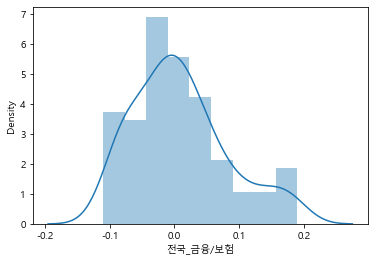

In [ ]:
# 히스토그램
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

sns.distplot(df_t1["전국_금융/보험"])